In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset


In [2]:
file_path = '/content/malwaraDataset.csv'
data = pd.read_csv(file_path, low_memory=False)

# Step 1: Data Preprocessing
# Convert the target column 'class' to numerical labels

In [3]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])



# Handle mixed types by converting problematic columns to numeric (if possible)

In [4]:
data = data.apply(pd.to_numeric, errors='coerce')


# Drop columns with excessive NaN values

In [6]:
threshold = 0.5
data = data.loc[:, data.isnull().mean() < threshold]


# Fill remaining NaN values with 0

In [7]:
data = data.fillna(0)

# Step 2: Splitting the Data

In [8]:
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target

# Split into training and testing sets (80% train, 20% test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation
# Initialize the Random Forest classifier

In [10]:
model = RandomForestClassifier(random_state=42)

# Train the model

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions on the test set

In [12]:
y_pred = model.predict(X_test)

# Evaluate the model

In [13]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results

In [14]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1863
           1       0.99      0.97      0.98      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008




# Visualization Section
# 1. Correlation Heatmap

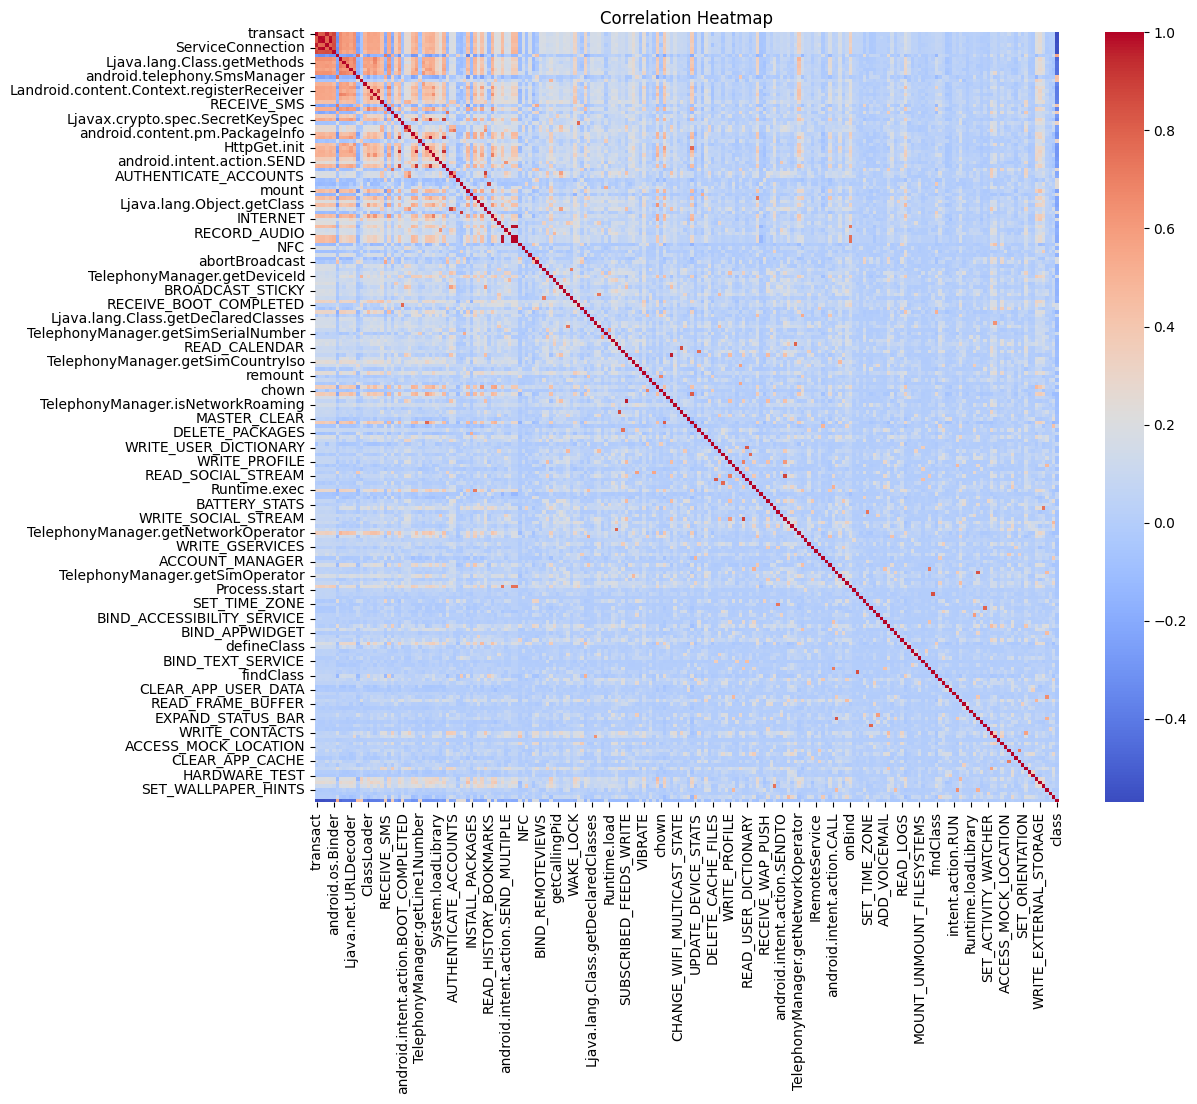

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 2. Class Distribution

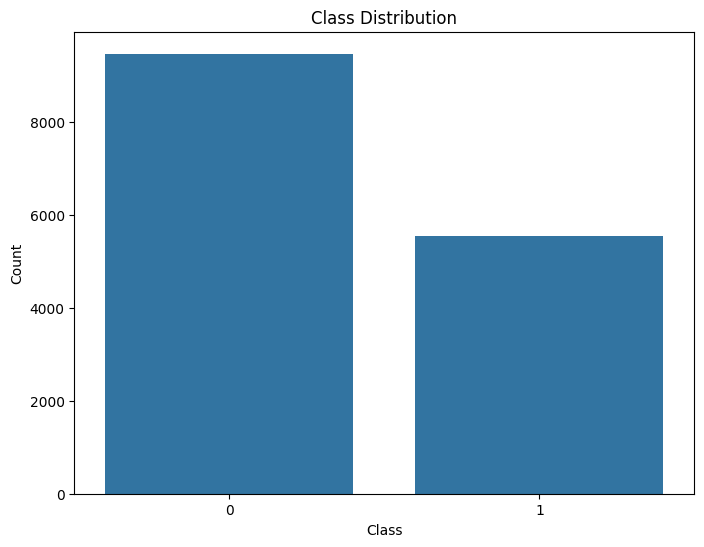

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# 3. Feature Importance Plot

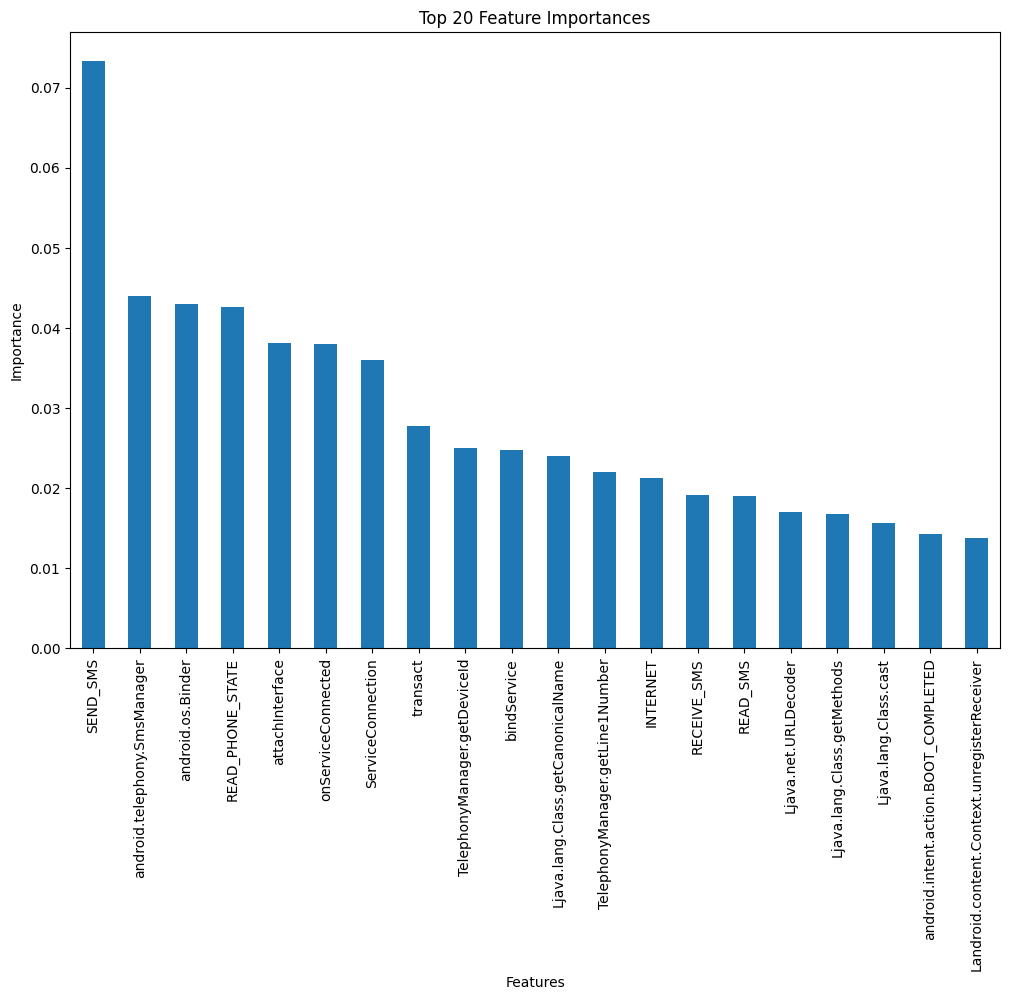

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
